In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paddy-disease-dataset/paddy-disease-classification/sample_submission.csv
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train.csv
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/109629.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/104765.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/109706.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/100098.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/102734.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/106433.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/108930.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images/tungro/102019.jpg
/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train

### Importing libraries 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

### Dataset

In [4]:
seed = 40
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=seed  # Add seed argument
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=seed  # Add seed argument
)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [5]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = '/kaggle/input/paddy-disease-dataset/paddy-disease-classification/train_images'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 10


In [7]:
# create CNN model

model = Sequential()


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',strides = 1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',strides = 1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides = 1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='same',strides = 1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 84, 84, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 82, 82, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,930 (499.73 KB)

 Trainable params: 127,930 (499.73 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,  # Set to the value of val_loss at the desired epoch
    restore_best_weights=False,
)

In [11]:
# real waly images use ni hongy jo images transform han wo use hongy
history = model.fit(train_ds, validation_data=validation_ds, epochs=500,callbacks=[early_stopping] )

Epoch 1/500


I0000 00:00:1728655961.819403      82 service.cc:145] XLA service 0x7c73c400ded0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728655961.819481      82 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  3/261 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.0816 - loss: 2.3086 

I0000 00:00:1728655969.761492      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


261/261 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.1964 - loss: 2.1369 - val_accuracy: 0.3878 - val_loss: 1.7645
Epoch 2/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.3765 - loss: 1.7563 - val_accuracy: 0.4224 - val_loss: 1.6145
Epoch 3/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.4598 - loss: 1.5672 - val_accuracy: 0.5103 - val_loss: 1.4529
Epoch 4/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.5365 - loss: 1.3625 - val_accuracy: 0.5579 - val_loss: 1.3062
Epoch 5/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.6096 - loss: 1.1708 - val_accuracy: 0.6468 - val_loss: 1.0728
Epoch 6/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.6581 - loss: 1.0325 - val_accuracy: 0.6444 - val_loss: 1.0699
Epoch 7/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.7060 - loss: 0.8909 - val_accuracy: 0.7088 - val_loss: 0.9128
Epoch 8/500
261/261 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.7196 - loss: 0.8401 - val_

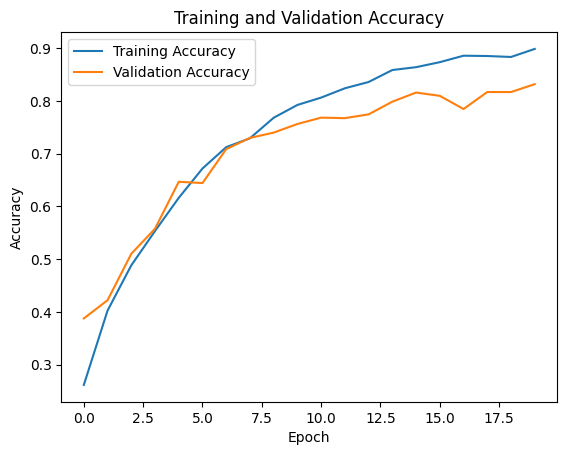

In [12]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [13]:
model.save('rice_model.h5')